In [15]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

initialized two matrix constants m1 and m2. dot_operation stores the result of matmul (matrix multiplication) of m1 and m2. tf.constant() creates a constant Tensor. tf.matmul() returns a Tensor of same type as m1 and m2.

In [3]:
m1 = tf.constant([[2,2]])
m2 = tf.constant([[3],[3]])
dot_operation = tf.matmul(m1,m2)
print(dot_operation)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

In [4]:
with tf.Session() as sess:
    result_ = sess.run(dot_operation)
    print(result_)

[[12]]


### Variables###

A TensorFlow variable is a way to represent shared, persistent state manipulated by your program. A tf.Variable exsts outside the context of a single session.run call. This happens even for the variables defined in the session. sess.run(tf.global_variables_initializer()) initializes all global variables.

In [5]:
var = tf.Variable(8)

In [6]:
add_operation = tf.add(var,1)
update_operation = tf.assign(var,add_operation)

In [7]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(3):
    sess.run(update_operation)
    print(sess.run(var))

9
10
11


### Placeholder
A placeholder is a variable to which we assign data to a later date. It allows us to create out operations and buid our computation graph, without needing the data. In TensorFlow terms, we feed the data into the graph through these placeholders.

In [8]:
x1 = tf.placeholder(dtype=tf.float32, shape=None)
y1 = tf.placeholder(dtype=tf.float32, shape=None)
z1 = x1 + y1

x2 = tf.placeholder(dtype=tf.float32, shape=[2,1])
y2 = tf.placeholder(dtype=tf.float32, shape=[1,2])
z2 = tf.matmul(x2, y2)

In [9]:
with tf.Session() as sess:
    # running one operation
    z1_value = sess.run(z1, feed_dict={x1: 5, y1: 6})
    print(z1_value)
    
    # running two operations at once
    z1_value, z2_value = sess.run([z1, z2],feed_dict = {x1:1, y1:2, x2:[[2],[3]], y2:[[3,3]]})
    print(z1_value)
    print(z2_value)

11.0
3.0
[[6. 6.]
 [9. 9.]]


### Activation Function
Activation function scales output of a node given an input or set of input.

exaples

In [12]:
x = np.linspace(-5,5,200)

y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

In [16]:
sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

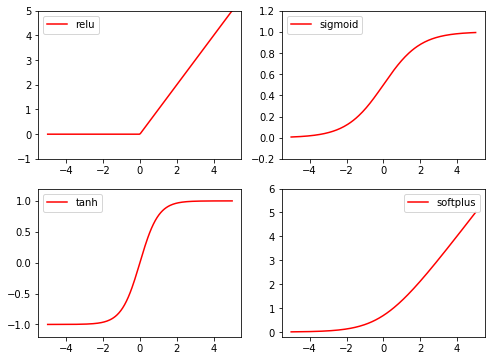

In [25]:
plt.figure(1, figsize=(8, 6))


plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')



plt.show()


### Regression

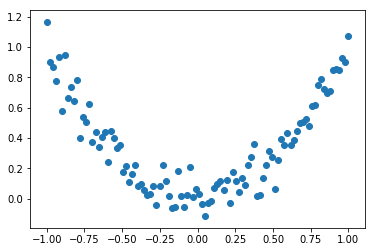

In [26]:
tf.set_random_seed(1)
np.random.seed(1)

# data initialization
# linspace creates a list with continous intervals of range -1 to 1
# newaxis increases the dimension i.e. changes (1,100) to (100,1)
x = np.linspace(-1,1,100)[:, np.newaxis]
noise = np.random.normal(0,0.1,size=x.shape)
y = np.power(x,2) + noise

# plot the data
plt.scatter(x,y)
plt.show()

In [27]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

In [28]:
# hidden layer
l1 = tf.layers.dense(tf_x,10,tf.nn.relu)
# output layer
output = tf.layers.dense(l1, 1)

# compute cost
loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train_op = optimizer.minimize(loss)

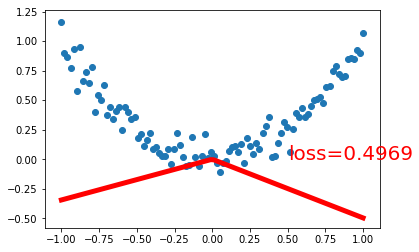

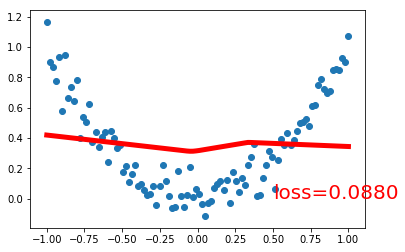

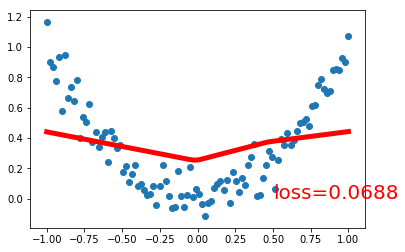

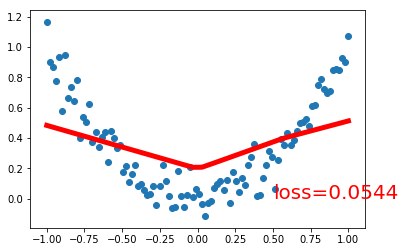

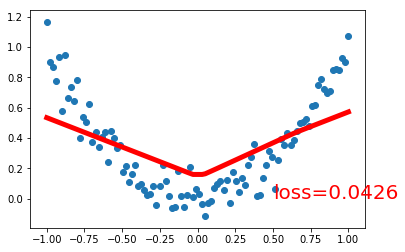

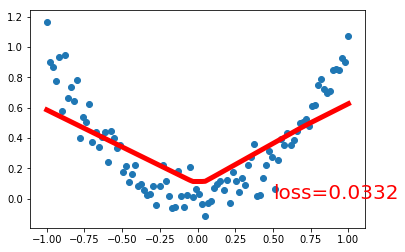

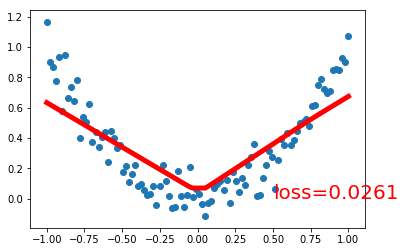

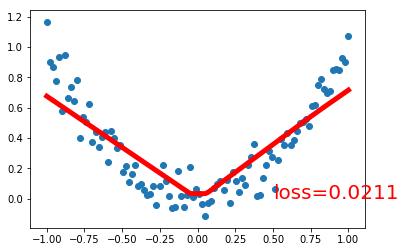

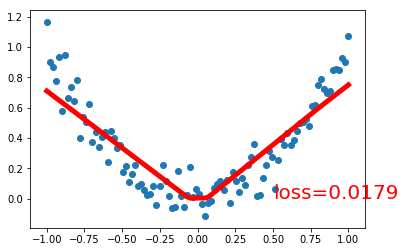

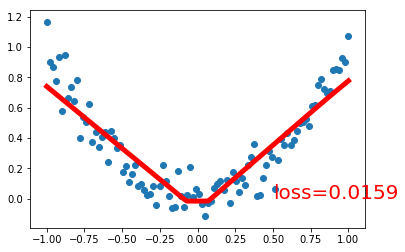

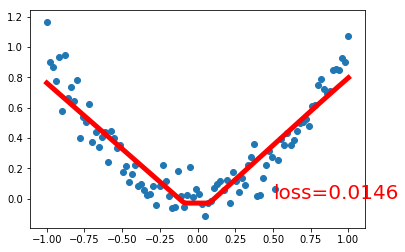

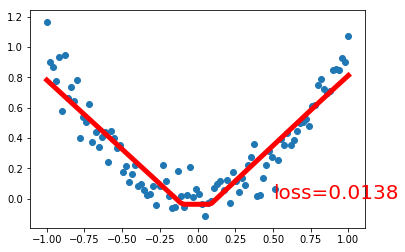

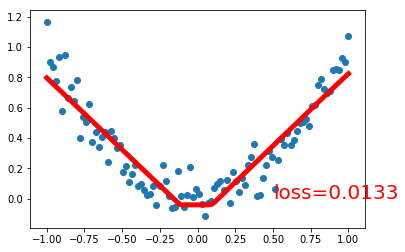

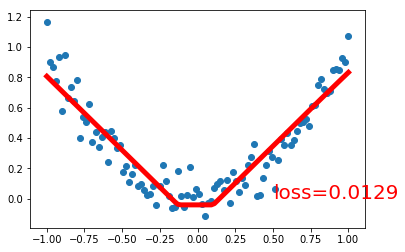

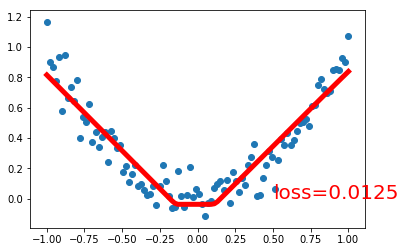

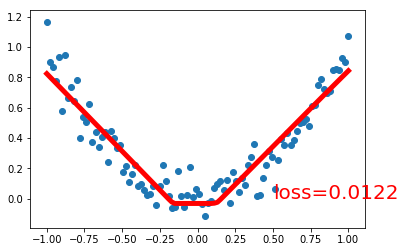

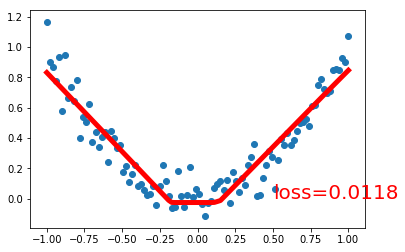

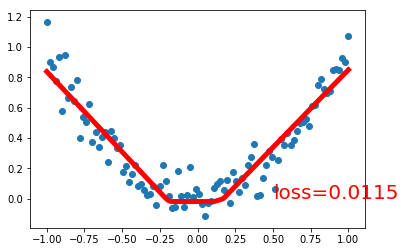

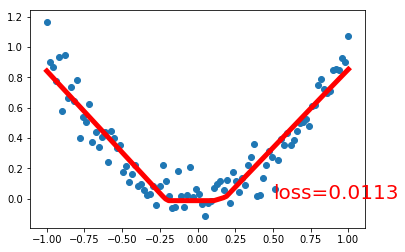

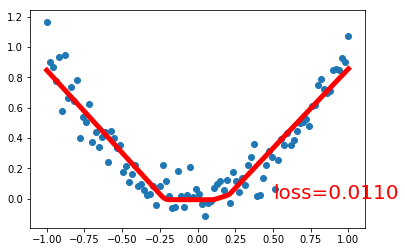

In [29]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

plt.ion()

for step in range(100):
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step%5 == 0:
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'loss=%.4f' % l, fontdict = {'size': 20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

### classification

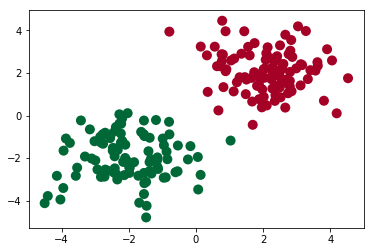

In [30]:
n_data = np.ones((100,2))
# numpy.random.normal draws random samples from a normal(Gaussian) distribution
x0 = np.random.normal(2*n_data,1)      # class0 x shape =(100,2)
y0 = np.zeros(100)                     # class0 y shape =(100,1)
x1 = np.random.normal(-2*n_data, 1)    # class1 x shape =(100,2)
y1 = np.ones(100)                      # class1 y shape =(100,1)
# vertical stacking
x = np.vstack((x0, x1))    # shape (200,2) + some noise
# horizontal stacking
y = np.hstack((y0, y1))    # shape (200, )

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

In [31]:
# input x and y
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

In [32]:
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
output = tf.layers.dense(l1, 2)           # output layer

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)    # cost function
# return (acc, update_op), and create 2 local variable
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

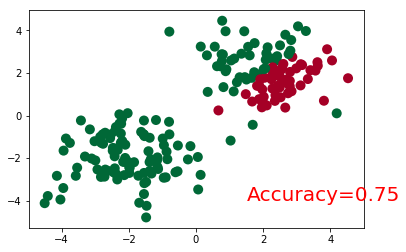

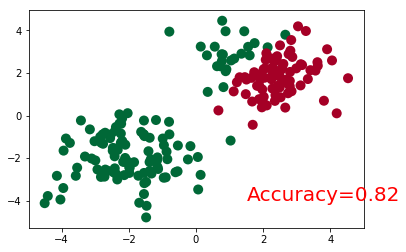

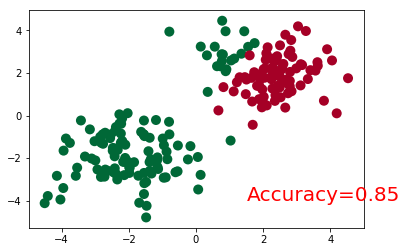

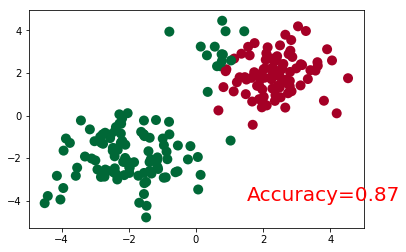

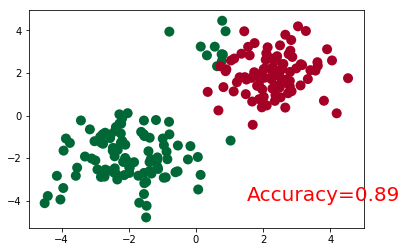

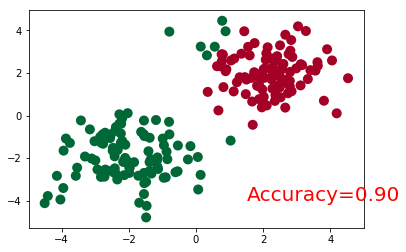

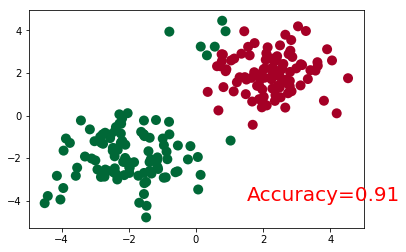

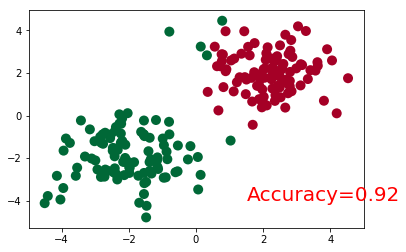

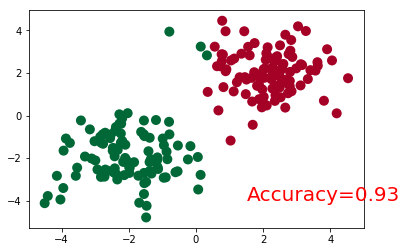

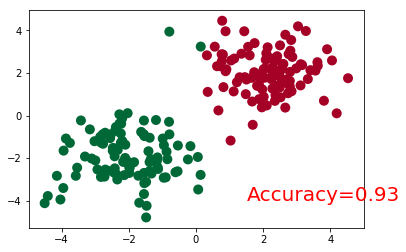

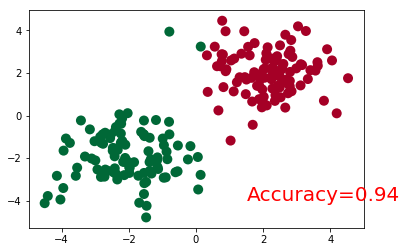

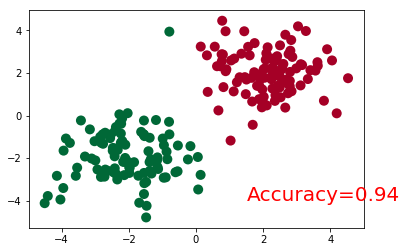

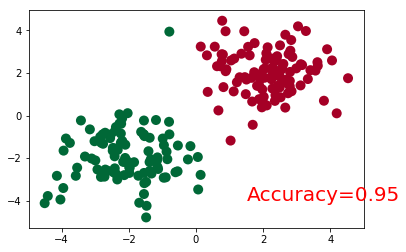

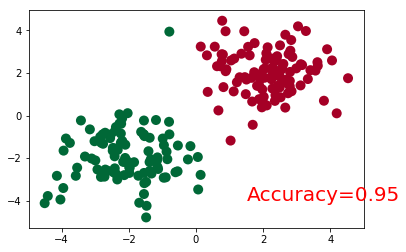

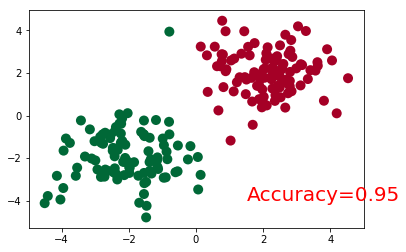

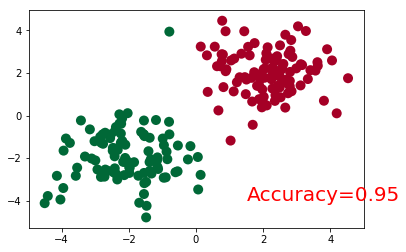

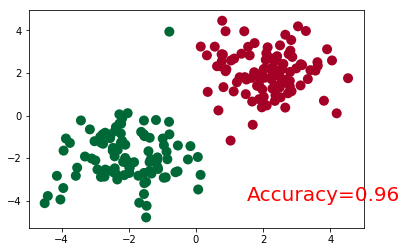

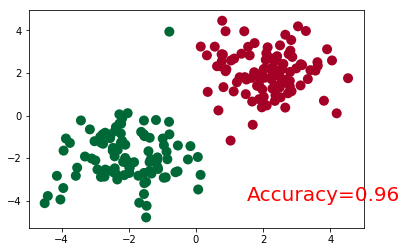

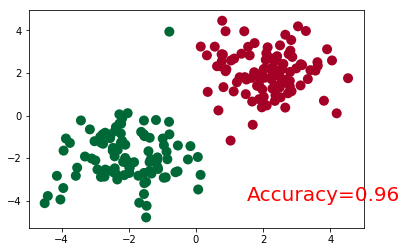

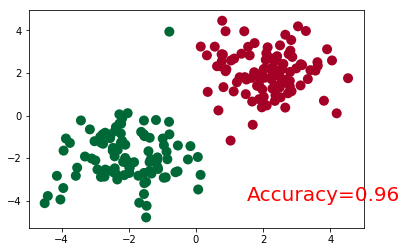

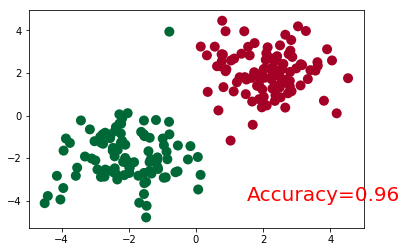

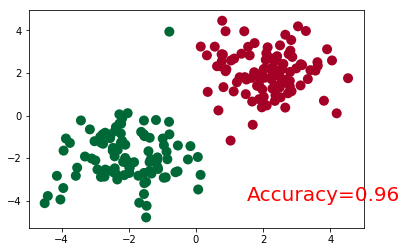

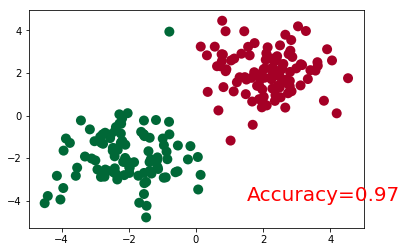

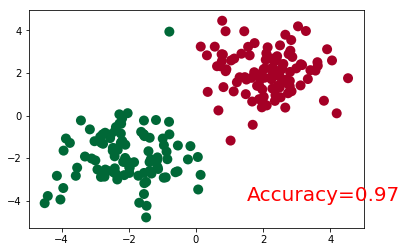

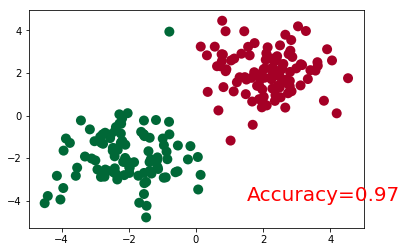

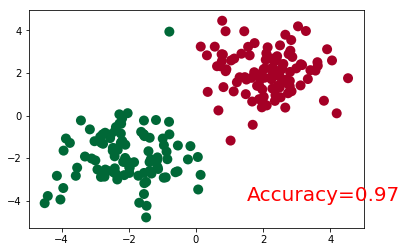

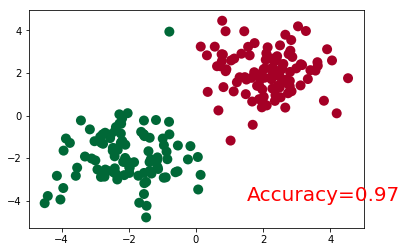

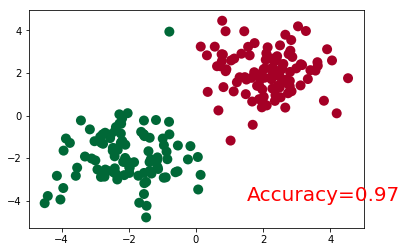

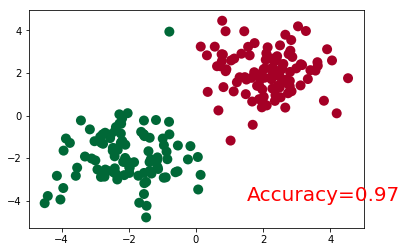

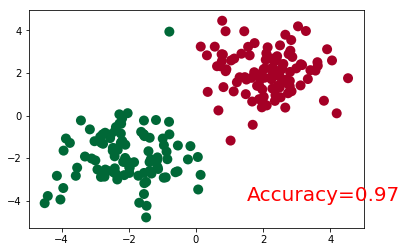

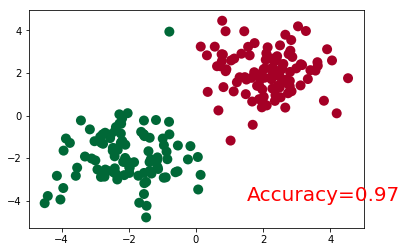

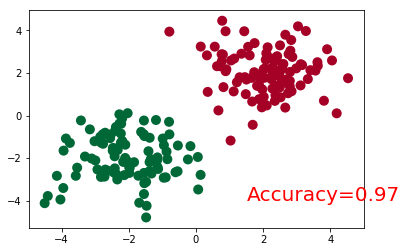

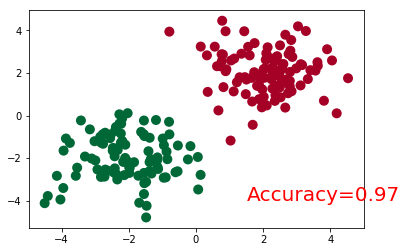

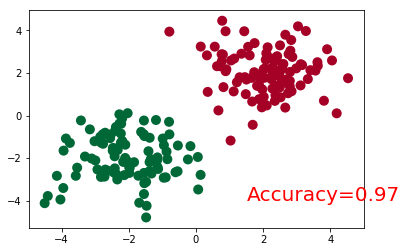

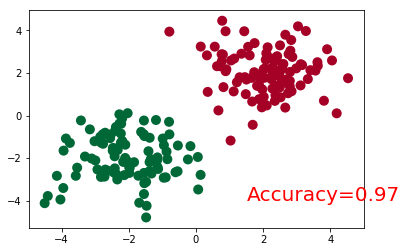

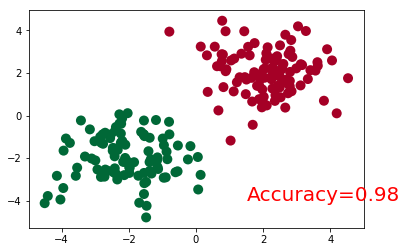

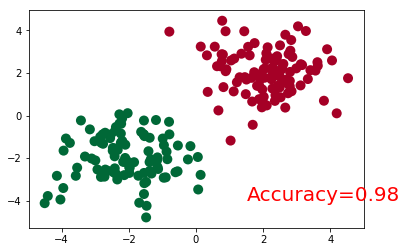

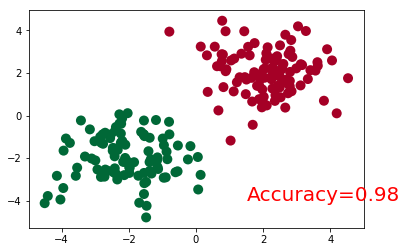

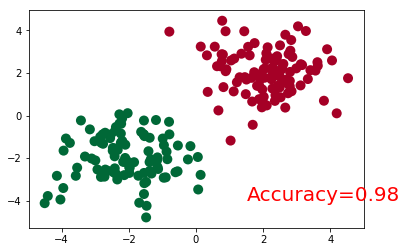

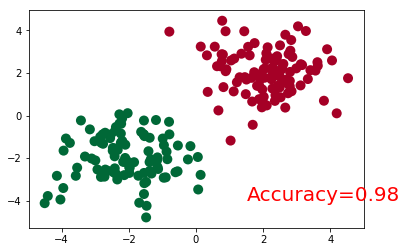

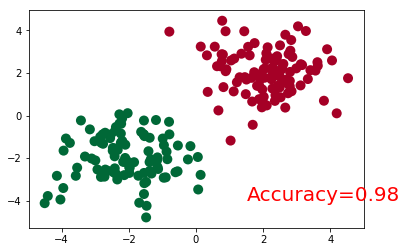

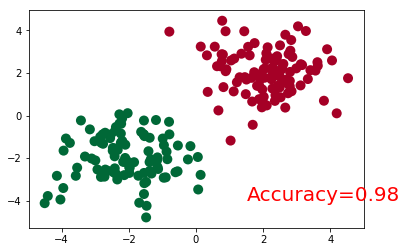

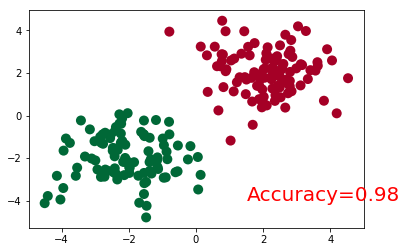

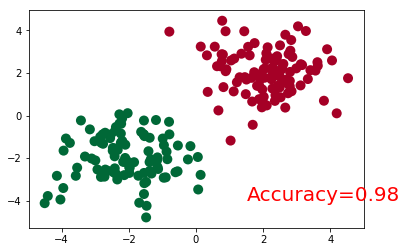

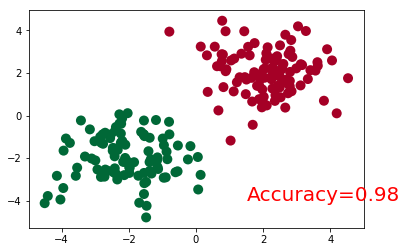

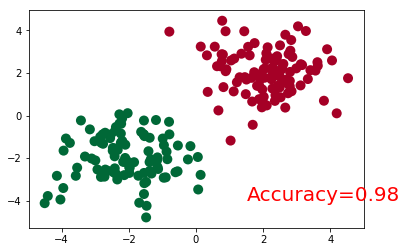

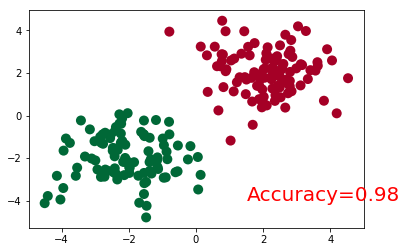

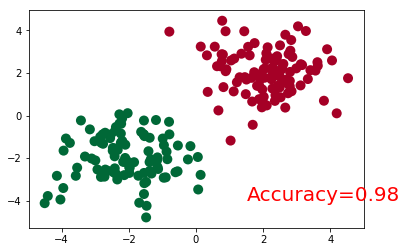

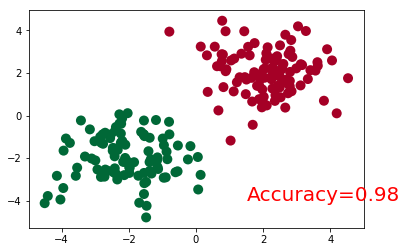

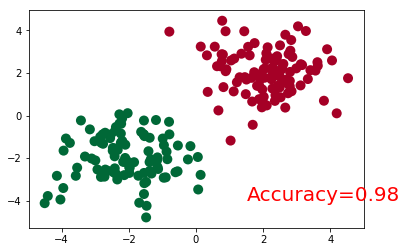

In [33]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

plt.ion()
for step in range(100):
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step%2 == 0:
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()